<a href="https://colab.research.google.com/github/liamskydamien/Sci_Prog_Python/blob/main/assignment_6_LiamHess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scientific Programming with Python
## Liam Sky Damien Hess
## Bonn-Rhein-Sieg University of Applied Sciences
### Bonn, Germany
#### Assignment 6

# Assignment: Galileo's Horizontal Ball Drop

Author: Liam Sky Damien Hess (lhess2s, 9043939)

Date: July 9, 2023

---
##Assignment and Goal:

The assignment is to calculate and compare Galileo's experimental data with a modern solution for the problem of calculating the distance of the horizontal balldrop.
The goal is to gain a deeper understanding of SciPy[1] and Matplotlib[2] and how to use them.

I will achieve this goal through finishing 4 tasks:
- Create user-defined functions for computing Galileo's equation and the modern solution
- Computing the Root-Mean-Squared-Error for both equations
- Using 'interpld' of the SciPy libary[1] to interpolate and extrapolate the data
- Visualize and Compare the data

##Problem and Inputdata:
In 1608, Galileo worked on preliminary data for the motion of a falling ball thats moving horizontally. In this experiment a ball was placed on different heights on an incline, got released, and the went airborne to land at a horizontal distance. The distance the ball flew got measured afterwards. The independent variable in this experiment was the initial height of the ball and the dependent data was the horizontal distance the ball travelled. All data got measured in Galileo's points.


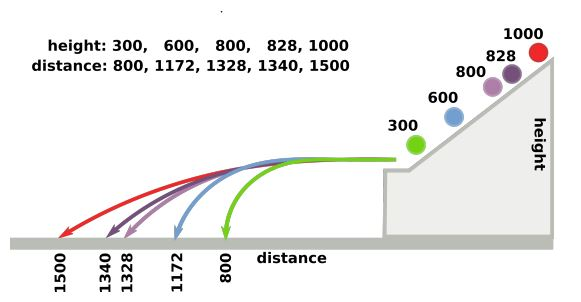

Figure 1: An illustration of Galileo's experiment. Units are are in points. [3]

From the collected data (showcased in Figure 1) and Galileo's formulations the following equation got obtained (from now on referenced as Equation 1). The equation should predict how far horizontally a ball travels when dropped from a certain height:
$$ distance = 2 * (\frac{5}{7})^{\frac{1}{2}} * height $$
This equation represents Galileo's perspective on the problem, with a few minor adjustments[4]

A modern perspective on that problem obtained through polynomail curve fitting, suggests a qudaratic equation (from now on referenced as Equation 2) to predict the horizontal landing distance:
$$ distance=-0.0013 * (height^2) + 2.69 * height + 32.18 $$

In both equations is:
- distance = the ball's horizontal landing distance
- height = the ball's initial height










## Imports for this assignment
 - math
 - Matplotlib[2]
 - SciPy[3]
 - Typing

In [73]:
## Matplotlib
import matplotlib
import matplotlib.pyplot as plt

## Scipy
import scipy

## Typing
import typing

print('Versions Used')
print(f'matplotlib: {matplotlib.__version__}')
print(f'SciPy: {scipy.__version__}')

Versions Used
matplotlib: 3.7.1
SciPy: 1.10.1


## Task 1: Create user-defined functions that encode Equation 1 and 2

### Encode Equation 1
$ distance = 2 * (\frac{5}{7})^{\frac{1}{2}} * height $

In [74]:
## Calculate 2 * ((5/7)^(1/2))
2* ((5/7) ** (1/2))

1.6903085094570331

In [75]:
def calculate_galileos_equation(height: float) -> float:
    '''
        This function calculates the value of Galileo's equation at a specified height.

        Args:
            height  - A float representing the height at which Galileo's equation is evaluated.

        Returns:
            distance- The value of Galileo's equation at the specified height.
                      It is calculated as 1.6903085094570331 * height, where 1.6903085094570331 is a constant
                      that equals 2 * (5/7)^(1/2).

        Raises:
            TypeError  - If the height is not a float.
    '''

    ## Check the input type
    if type(height) is not float:
        raise TypeError('Please check your input value for heights.')

    ## 2 * (5/7)^(1/2) = 1.6903085094570331 is a constant value
    FACTOR = 1.6903085094570331

    ## Calculate the distance
    distance = FACTOR * height

    return distance

### Encode Equation 2
$ distance=-0.0013 * (height^2) + 2.69 * height + 32.18 $

In [76]:
def calculate_quadratic_equation(height: float) -> float:
    '''
        This function calculates the value of the quadratic equation at a specified height.

        Args:
            height  - A float representing the height at which the quadratic equation is evaluated.

        Returns:
            distance- The value of the quadratic equation at the specified height.
                      It is calculated as -0.0013 * height^2 + 2.69 * height + 32.18.

        Raises:
            TypeError  - If the height is not a float.
    '''

    ## Check the input type
    if type(height) is not float:
        raise TypeError('Please check your input value for height.')

    height_squared = height ** 2

    ## Calculate distance
    distance = -0.0013 * height_squared + 2.69 * height + 32.18

    return distance

## Task 2: Compute Root-Mean-Squared-Error (RSME) of both equations

The RSME is computed through:
$$\sqrt{\frac{1}{n}\sum_{i = 1}^{n}(X_{i}- Y)^2}$$


In [77]:
def calculate_RMSE_between_two_lists(input: list, expected: list) -> float:
    '''
        This function calculates the Root Mean Square Error (RMSE) between two lists of numerical values.

        Args:
            input   - A list of numerical values representing the predicted or estimated values.
            expected- A list of numerical values representing the observed or true values.
                      The order of values in the expected list matches the order in the input list.

        Returns:
            rmse    - The Root Mean Square Error between the input and expected lists.
                      It is a measure of the differences between values predicted by a model and the values observed.

        Raises:
            TypeError  - If either the input or expected values are not of list type.
            ValueError - If the input and expected lists do not have the same length.
    '''

    ## Check the types of the inputs
    if type(input) is not list:
      raise TypeError('Please check your input value for input.')
    elif type(expected) is not list:
      raise TypeError('Please check your input value for expected.')
    elif len(input) != len(expected):
      raise ValueError('Length of given lists does not match.')

    n = len(input)

    ## For each element in input perform (x - y)^2
    squared_errors = [(input[i] - expected[i]) ** 2 for i in range(n)]

    sum_squared_errors = sum(squared_errors)

    mean_squared_error = sum_squared_errors / n

    ## Calculate the squareroot
    rmse = mean_squared_error ** 0.5

    return rmse


### Define input and experimental values
|Height|Distance|
|------|------|
|300|800|
|600|1172|
|800|1328|
|828|1340|
|1000|1500|

In [78]:
## Input values for height
heights = [300.,600.,800.,828.,1000.]

## Expected distance
distances = [800.,1172.,1328.,1340.,1500.]

### Calculate RSME for Equation 1 and Experiment values

In [79]:
## Calculates the distances for each height in heights with Galileos Equation
equation_1_distances = [calculate_galileos_equation(height = height) for height in heights]

## Calculates the RSME based on the calculated distances and the measured ones
equation_1_rsme = calculate_RMSE_between_two_lists(input = equation_1_distances,
                                                   expected = distances)

print(f'The RSME of the calculated and the experimental values is {equation_1_rsme}')

The RSME of the calculated and the experimental values is 173.8129935702819


### Calculate the RSME for Equation 2 and the Experiment values

In [80]:
## Calculates the distances for each height in heights with quadratic equation
equation_2_distances = [calculate_quadratic_equation(height = height) for height in heights]

## Calculates the RSME based on the calculated distances and the measured ones
equation_2_rsme = calculate_RMSE_between_two_lists(input = equation_2_distances,
                                                   expected = distances)

print(f'The RSME of the calculated and the experimental values is {equation_2_rsme}')

The RSME of the calculated and the experimental values is 52.0236722745329


### Comparison of RSME and Conclusion
Since the Root-Mean-Squared-Error is a measure of accuracy a low RSME means that the dataset is more accurate then a dataset with a high RSME. [5]

The RSME of Equation 2 compared to Equation 1 is significantly lower with 52.024 against 173.813.
That means Equation 2 is far more precise then Equation 1, but since the equation is still far above 0 its not perfectly precise.*kursiver Text*

## Task 3: Interpolate and extra polate data from the data collected through the equations

### Import 'interpld' from SciPy

In [81]:
from scipy.interpolate import interp1d

### Define an interpolate function

In [82]:
def interpolate_data(heights: list, distances: list, kind: str, height: float ) ->  float:
    '''
        This function performs interpolation (or extrapolation) on a dataset of heights and corresponding distances
        and computes the interpolated or extrapolated value at a specified height.

        Args:
            heights     - A list of numerical values representing different heights.
            distances   - A list of numerical values representing distances corresponding to the heights.
                          The order of distances matches the order of heights.
            kind        - A string indicating the type of interpolation to be used. This could be 'linear', 'nearest',
                          'zero', 'slinear', 'quadratic', 'cubic', 'previous', or 'next'.
            height      - A float representing the height at which the distance is to be interpolated or extrapolated.

        Returns:
            interpolated_data - The interpolated or extrapolated distance at the specified height.

        Raises:
            TypeError  - If any of the inputs are not of the correct type.
            ValueError - If any errors occur during the interpolation process, such as if heights and distances do not have
                        the same length, or if kind is not a valid type of interpolation.
    '''

    ## Check the types of the inputs
    if type(heights) is not list:
      raise TypeError('Please check your input value for heights.')
    elif type(distances) is not list:
      raise TypeError('Please check your input value for distances.')
    elif type(kind) is not str:
      raise TypeError('Please check your input value for kind.')
    elif type(height) is not float:
      raise TypeError('Please check your input value for height.')

    ## Incase the input values are not correct
    try:

      ## Create interpolation function
      interpolate_function = interp1d(x = heights,
                                      y = distances,
                                      kind = kind,
                                      fill_value = 'extrapolate')

      ## Calculate value at specified height
      interpolated_data = interpolate_function(height)

      return interpolated_data

    except:
        raise ValueError('Please check your input value.')


### Generate interploated data from the calculated values

#### Interpolated values from Equation 1:

In [83]:
## Calculates the interpolated and extrapolated values of Equation 1 for the kind = Linear
eq_1_inter_linear = [interpolate_data(heights = heights,
                                distances = equation_1_distances,
                                kind = 'linear',
                                height = float(i))
              for i in range(0, 1001)]

## Calculates the interpolated and extrapolated values of Equation 1 for the kind = Quadratic
eq_1_inter_quadratic = [interpolate_data(heights = heights,
                                distances = equation_1_distances,
                                kind = 'quadratic',
                                height = float(i))
              for i in range(0, 1001)]

## Calculates the interpolated and extrapolated values of Equation 1 for the kind = Cubic
eq_1_inter_cubic = [interpolate_data(heights = heights,
                                distances = equation_1_distances,
                                kind = 'cubic',
                                height = float(i))
              for i in range(0, 1001)]

## Calculates the interpolated and extrapolated values of Equation 1 for the kind = Nearest
eq_1_inter_nearest = [interpolate_data(heights = heights,
                                distances = equation_1_distances,
                                kind = 'nearest',
                                height = float(i))
              for i in range(0, 1001)]

## Calculates the interpolated and extrapolated values of Equation 1 for the kind = Previous
eq_1_inter_previous = [interpolate_data(heights = heights,
                                distances = equation_1_distances,
                                kind = 'previous',
                                height = float(i))
              for i in range(0, 1001)]

## Calculates the interpolated and extrapolated values of Equation 1 for the kind = Next
eq_1_inter_next = [interpolate_data(heights = heights,
                                distances = equation_1_distances,
                                kind = 'next',
                                height = float(i))
              for i in range(0, 1001)]

#### Interpolated values from Equation 2:

In [84]:
## Calculates the interpolated and extrapolated values of Equation 2 for the kind = Linear
eq_2_inter_linear = [interpolate_data(heights = heights,
                                distances = equation_2_distances,
                                kind = 'linear',
                                height = float(i))
              for i in range(0, 1001)]

## Calculates the interpolated and extrapolated values of Equation 2 for the kind = Quadratic
eq_2_inter_quadratic = [interpolate_data(heights = heights,
                                distances = equation_2_distances,
                                kind = 'quadratic',
                                height = float(i))
              for i in range(0, 1001)]

## Calculates the interpolated and extrapolated values of Equation 2 for the kind = Cubic
eq_2_inter_cubic = [interpolate_data(heights = heights,
                                distances = equation_2_distances,
                                kind = 'cubic',
                                height = float(i))
              for i in range(0, 1001)]

## Calculates the interpolated and extrapolated values of Equation 2 for the kind = Nearest
eq_2_inter_nearest = [interpolate_data(heights = heights,
                                distances = equation_2_distances,
                                kind = 'nearest',
                                height = float(i))
              for i in range(0, 1001)]

## Calculates the interpolated and extrapolated values of Equation 2 for the kind = Previous
eq_2_inter_previous = [interpolate_data(heights = heights,
                                distances = equation_2_distances,
                                kind = 'previous',
                                height = float(i))
              for i in range(0, 1001)]

## Calculates the interpolated and extrapolated values of Equation 2 for the kind = Next
eq_2_inter_next = [interpolate_data(heights = heights,
                                distances = equation_2_distances,
                                kind = 'next',
                                height = float(i))
              for i in range(0, 1001)]

#### Interpolated values from measured data:

In [85]:
## Calculates the interpolated and extrapolated values of Equation 2 for the kind = Linear
md_inter_linear = [interpolate_data(heights = heights,
                                distances = distances,
                                kind = 'linear',
                                height = float(i))
              for i in range(0, 1001)]

## Calculates the interpolated and extrapolated values of Equation 2 for the kind = Quadratic
md_inter_quadratic = [interpolate_data(heights = heights,
                                distances = distances,
                                kind = 'quadratic',
                                height = float(i))
              for i in range(0, 1001)]

## Calculates the interpolated and extrapolated values of Equation 2 for the kind = Cubic
md_inter_cubic = [interpolate_data(heights = heights,
                                distances = distances,
                                kind = 'cubic',
                                height = float(i))
              for i in range(0, 1001)]

## Calculates the interpolated and extrapolated values of Equation 2 for the kind = Nearest
md_inter_nearest = [interpolate_data(heights = heights,
                                distances = distances,
                                kind = 'nearest',
                                height = float(i))
              for i in range(0, 1001)]

## Calculates the interpolated and extrapolated values of Equation 2 for the kind = Previous
md_inter_previous = [interpolate_data(heights = heights,
                                distances = distances,
                                kind = 'previous',
                                height = float(i))
              for i in range(0, 1001)]

## Calculates the interpolated and extrapolated values of Equation 2 for the kind = Next
md_inter_next = [interpolate_data(heights = heights,
                                distances = distances,
                                kind = 'next',
                                height = float(i))
              for i in range(0, 1001)]

## Task 4: Visualize and Compare

### Visualize the experimentally measured data and the data given through Equation 1 & 2

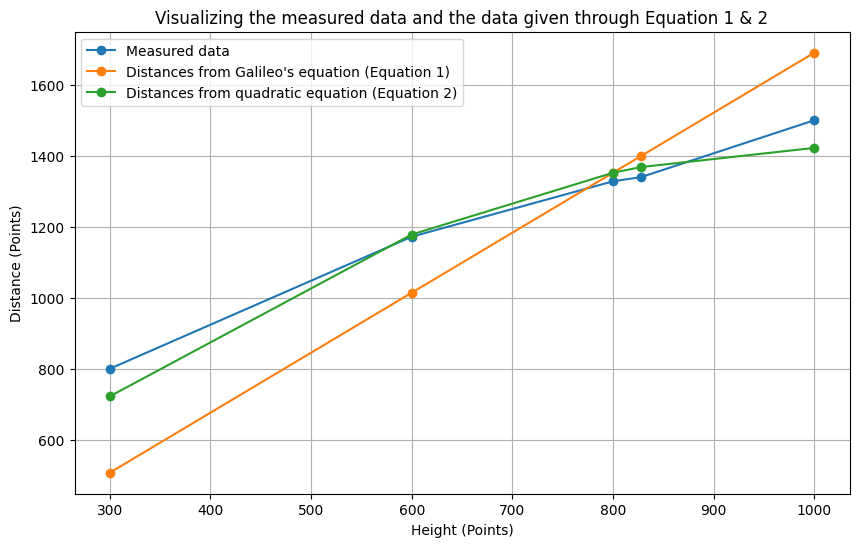

In [86]:
## Setup size
plt.figure(figsize=(10, 6))

## Plot expected distances
plt.plot(heights, distances, 'o-', label='Measured data')

## Plot distances calculated using Galileo's equation
plt.plot(heights, equation_1_distances, 'o-', label='Distances from Galileo\'s equation (Equation 1)')

## Plot distances calculated using the quadratic equation
plt.plot(heights, equation_2_distances, 'o-', label='Distances from quadratic equation (Equation 2)')

## Setup Plot
plt.xlabel('Height (Points)')
plt.ylabel('Distance (Points)')
plt.title('Visualizing the measured data and the data given through Equation 1 & 2')
plt.legend()
plt.grid(True)

## Show Plot
plt.show()

The plot of the quadratic equation (Equation 2) is much closer to the plot from Equation 1. Thsi was already expected through the RSME comparison of both values.

### Visualize the experimentally measured data and the new data collected in Task 3

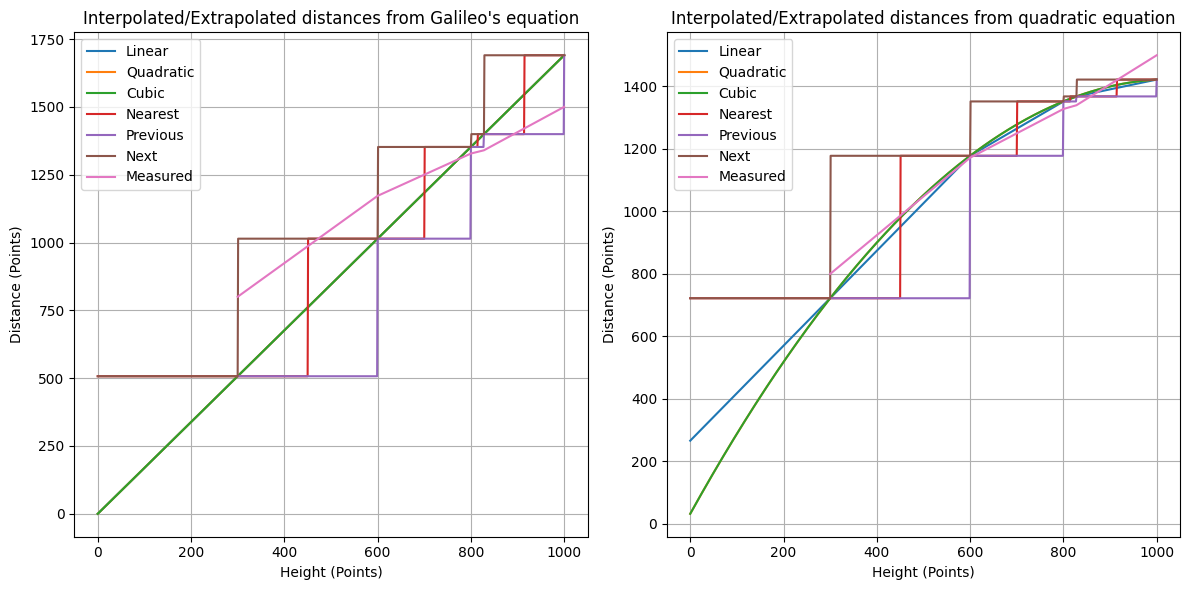

In [68]:
## Create subplots to differentiate between values from Equation 1 or 2
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 row, 2 columns

## Use the axes for individual plots

## Plot plots for Equation 1
axes[0].plot(range(0, 1001), eq_1_inter_linear, label='Linear')
axes[0].plot(range(0, 1001), eq_1_inter_quadratic, label='Quadratic')
axes[0].plot(range(0, 1001), eq_1_inter_cubic, label='Cubic')
axes[0].plot(range(0, 1001), eq_1_inter_nearest, label='Nearest')
axes[0].plot(range(0, 1001), eq_1_inter_previous, label='Previous')
axes[0].plot(range(0, 1001), eq_1_inter_next, label='Next')
axes[0].plot(heights, distances, label='Measured')

## Setup Plot for Equation 1
axes[0].set_xlabel('Height (Points)')
axes[0].set_ylabel('Distance (Points)')
axes[0].set_title('Interpolated/Extrapolated distances from Galileo\'s equation')
axes[0].legend()
axes[0].grid(True)


## Plot plots for Equation 2
axes[1].plot(range(0, 1001), eq_2_inter_linear, label='Linear')
axes[1].plot(range(0, 1001), eq_2_inter_quadratic, label='Quadratic')
axes[1].plot(range(0, 1001), eq_2_inter_cubic, label='Cubic')
axes[1].plot(range(0, 1001), eq_2_inter_nearest, label='Nearest')
axes[1].plot(range(0, 1001), eq_2_inter_previous, label='Previous')
axes[1].plot(range(0, 1001), eq_2_inter_next, label='Next')
axes[1].plot(heights, distances, label='Measured')

## Setup Plot for Equation 2
axes[1].set_xlabel('Height (Points)')
axes[1].set_ylabel('Distance (Points)')
axes[1].set_title('Interpolated/Extrapolated distances from quadratic equation')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()  # Adjust the padding between and around the subplots.

## Show Plot
plt.show()


### Visualize Interpolated/Extrapolated distances from the measured data

#### Plot the different kinds of interpolations and extrapolations

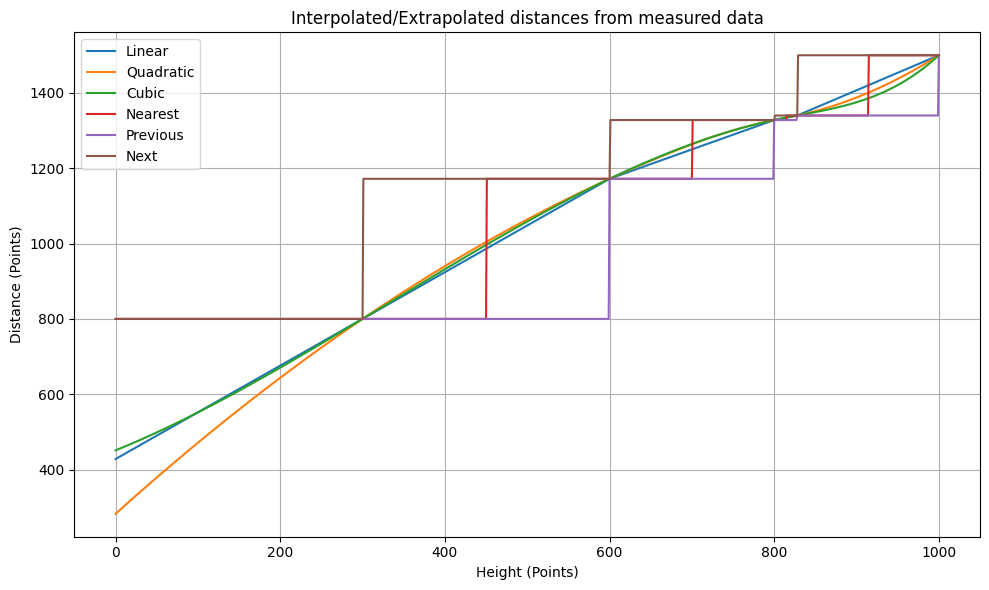

In [67]:
## Setup size
plt.figure(figsize=(10, 6))

## Plot interpolated distances for different kinds
plt.plot(range(0, 1001), md_inter_linear, label='Linear')
plt.plot(range(0, 1001), md_inter_quadratic, label='Quadratic')
plt.plot(range(0, 1001), md_inter_cubic, label='Cubic')
plt.plot(range(0, 1001), md_inter_nearest, label='Nearest')
plt.plot(range(0, 1001), md_inter_previous, label='Previous')
plt.plot(range(0, 1001), md_inter_next, label='Next')

## Setup plot
plt.xlabel('Height (Points)')
plt.ylabel('Distance (Points)')
plt.title('Interpolated/Extrapolated distances from measured data')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust the padding between and around the subplots.

## Show plot
plt.show()

#### Comparison between linear, quadratic and cubic interpolations of measured data, Equation 1 and Equation 2

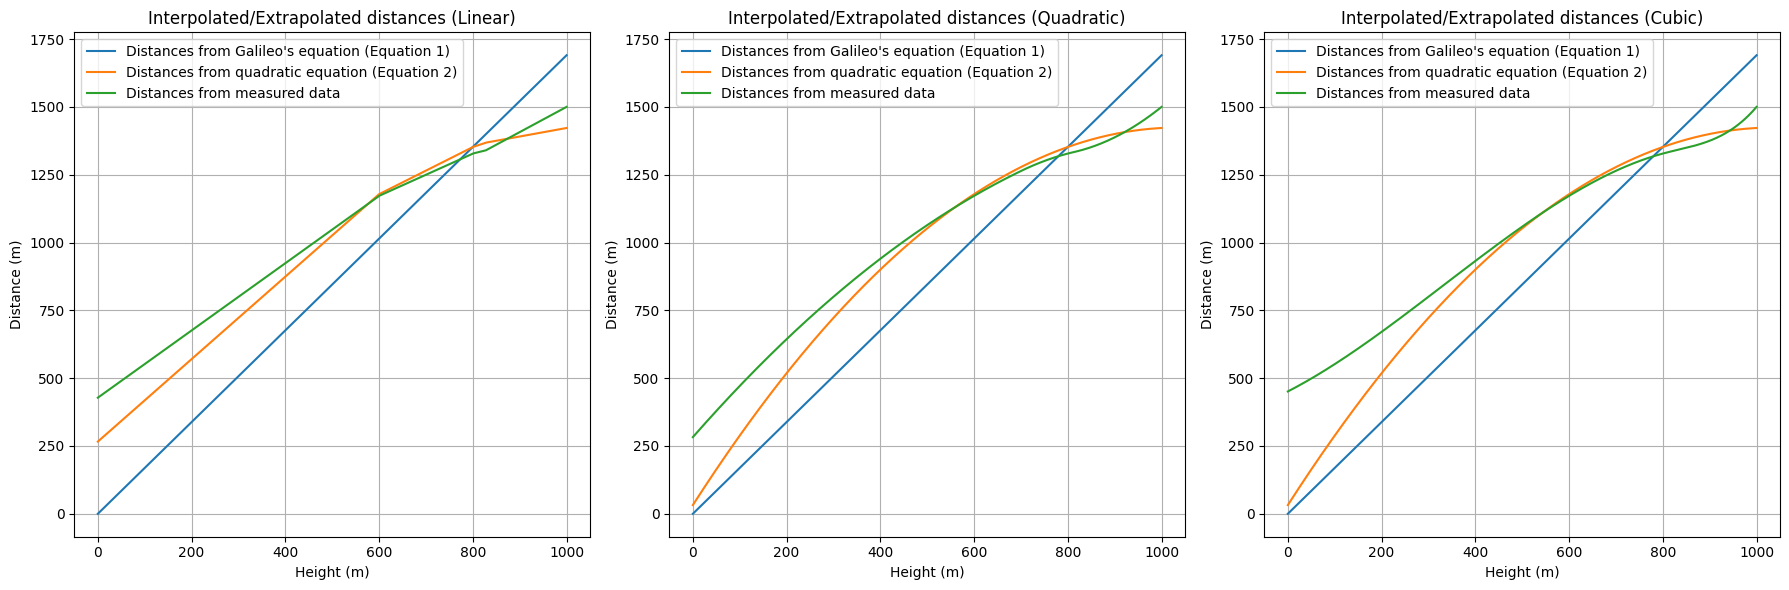

In [72]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # 1 row, 3 columns

## Plot interpolated linear distances for each dataset
axes[0].plot(range(0, 1001), eq_1_inter_linear, label = 'Distances from Galileo\'s equation (Equation 1)')
axes[0].plot(range(0, 1001), eq_2_inter_linear, label = 'Distances from quadratic equation (Equation 2)')
axes[0].plot(range(0, 1001), md_inter_linear, label = 'Distances from measured data')

## Setup plot
axes[0].set_xlabel('Height (m)')
axes[0].set_ylabel('Distance (m)')
axes[0].set_title('Interpolated/Extrapolated distances (Linear)')
axes[0].legend()
axes[0].grid(True)

## Plot interpolated quadratic distances for each dataset
axes[1].plot(range(0, 1001), eq_1_inter_quadratic, label = 'Distances from Galileo\'s equation (Equation 1)')
axes[1].plot(range(0, 1001), eq_2_inter_quadratic, label = 'Distances from quadratic equation (Equation 2)')
axes[1].plot(range(0, 1001), md_inter_quadratic, label = 'Distances from measured data')

## Setup plot
axes[1].set_xlabel('Height (m)')
axes[1].set_ylabel('Distance (m)')
axes[1].set_title('Interpolated/Extrapolated distances (Quadratic)')
axes[1].legend()
axes[1].grid(True)

## Plot interpolated cubic distances for each dataset
axes[2].plot(range(0, 1001), eq_1_inter_cubic, label = 'Distances from Galileo\'s equation (Equation 1)')
axes[2].plot(range(0, 1001), eq_2_inter_cubic, label = 'Distances from quadratic equation (Equation 2)')
axes[2].plot(range(0, 1001), md_inter_cubic, label = 'Distances from measured data')

## Setup plot
axes[2].set_xlabel('Height (m)')
axes[2].set_ylabel('Distance (m)')
axes[2].set_title('Interpolated/Extrapolated distances (Cubic)')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()  # Adjust the padding between and around the subplots.

## Show plot
plt.show()

The interpolated and extrapolated plots make it even clearer that Equation 2 is more accurate then Equation 1. The curve of the measured values is alligned with the interpolated and extrapolated data.

### Comparison and Conclusion
Through the comparison between the RSME values it was already clear that the quadratic function is more precise then Galileo's equation. But the plots made it even clearer that Eqaution 2 is more precise.

## References:

[1] Virtanen, P., Grommers, R., Oliphant, T.E et al. & SciPy 1.0 Contributors, SciPy 1.0: Fundamental Algorithms for Scientific Computing in Python Nature Methods, 2020, 17, 261-272.

[2] Hunter, J.D., Matplotlib: A 2D graphics enviroment, IEEE Annals of the History of Computing, 9, 2007, 90-95.

[3] Kirschner, K.N., Scientific Programming with Python Assignment: Galileo's Horizontal Ball Drop, 2023, Figure 2.

[4] Crawford, F.S., Rolling and slipping down Galileo's inclined plane: Rythms of the spheres. American Journal of Physics, 64(5), 1996, 541-546.

[5] Wikipedia's contributors, Root-mean-squared deviation https://en.wikipedia.org/wiki/Root-mean-square_deviation. Online; accessed on July 10, 2023.